In [70]:
import pandas as pd
%pylab inline
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
% matplotlib inline
import seaborn as sns
import re
import plotly.plotly as py
py.sign_in('username', 'password')
# Remember to input plotly login information

Populating the interactive namespace from numpy and matplotlib


In [71]:
data = pd.read_csv('h1b_kaggle.csv')

In [72]:
data.shape

(3002458, 11)

In [73]:
data.columns

Index(['Unnamed: 0', 'CASE_STATUS', 'EMPLOYER_NAME', 'SOC_NAME', 'JOB_TITLE',
       'FULL_TIME_POSITION', 'PREVAILING_WAGE', 'YEAR', 'WORKSITE', 'lon',
       'lat'],
      dtype='object')

In [74]:
data.head()

,Unnamed: 0,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE,lon,lat
0,1,CERTIFIED-WITHDRAWN,UNIVERSITY OF MICHIGAN,BIOCHEMISTS AND BIOPHYSICISTS,POSTDOCTORAL RESEARCH FELLOW,N,36067.0,2016.0,"ANN ARBOR, MICHIGAN",-83.743038,42.280826
1,2,CERTIFIED-WITHDRAWN,"GOODMAN NETWORKS, INC.",CHIEF EXECUTIVES,CHIEF OPERATING OFFICER,Y,242674.0,2016.0,"PLANO, TEXAS",-96.698886,33.019843
2,3,CERTIFIED-WITHDRAWN,"PORTS AMERICA GROUP, INC.",CHIEF EXECUTIVES,CHIEF PROCESS OFFICER,Y,193066.0,2016.0,"JERSEY CITY, NEW JERSEY",-74.077642,40.728158
3,4,CERTIFIED-WITHDRAWN,"GATES CORPORATION, A WHOLLY-OWNED SUBSIDIARY O...",CHIEF EXECUTIVES,"REGIONAL PRESIDEN, AMERICAS",Y,220314.0,2016.0,"DENVER, COLORADO",-104.990251,39.739236
4,5,WITHDRAWN,PEABODY INVESTMENTS CORP.,CHIEF EXECUTIVES,PRESIDENT MONGOLIA AND INDIA,Y,157518.4,2016.0,"ST. LOUIS, MISSOURI",-90.199404,38.627003


In [75]:
data.isnull().sum()

Unnamed: 0                 0
CASE_STATUS               13
EMPLOYER_NAME             59
SOC_NAME               17734
JOB_TITLE                 43
FULL_TIME_POSITION        15
PREVAILING_WAGE           85
YEAR                      13
WORKSITE                   0
lon                   107242
lat                   107242
dtype: int64

In [76]:
data.dropna(inplace=True)

In [77]:
data.shape

(2877765, 11)

** Dropped 4.15% of the raw data. **

### Columns ###

** 1. Case Status**

In [78]:
case_status = data.CASE_STATUS.unique()
case_status

array(['CERTIFIED-WITHDRAWN', 'WITHDRAWN', 'CERTIFIED', 'DENIED',
       'REJECTED', 'INVALIDATED',
       'PENDING QUALITY AND COMPLIANCE REVIEW - UNASSIGNED'], dtype=object)

In [79]:
status_freq = [0]*7                        # petitions distributions by status
for i in range(0,7):
    status_freq[i] = data[data.CASE_STATUS==case_status[i]]['CASE_STATUS'].count()

#status_freq[7] = data['CASE_STATUS'].isnull().sum()
status_freq

[195721, 84752, 2512114, 85161, 1, 1, 15]

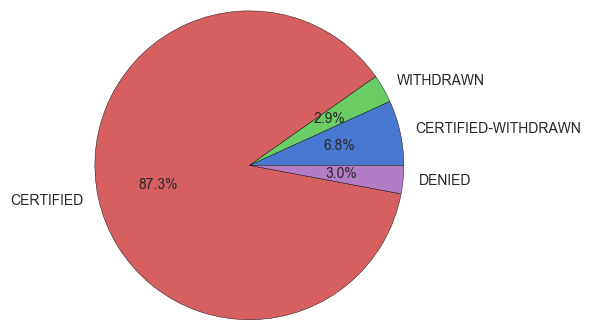

In [80]:
import matplotlib.pyplot as plt
 
# Plot
plt.pie(status_freq[:4], labels=case_status[:4], colors=sns.color_palette("muted", n_colors=4), autopct='%1.1f%%')
plt.axis('equal')
plt.figure(figsize=(2,2))
plt.show()

** 2. Employer Name **

In [81]:
print ("The total number of companies filed for H1b petition is " + str(len(data.EMPLOYER_NAME.unique())) + ".")

The total number of companies filed for H1b petition is 214982.


** Now Sort the companies based on the petition case number. **

In [122]:
top_employers = data['EMPLOYER_NAME'].value_counts()[:15]
top_employers_df = top_employers.to_frame()

In [123]:
def compute_percentage(x):
    pct = float(x/3002458) * 100
    return round(pct, 2)

top_employers_df['PERCENTAGE'] = top_employers_df['EMPLOYER_NAME'].apply(compute_percentage)
top_employers_df

,EMPLOYER_NAME,PERCENTAGE
INFOSYS LIMITED,130257,4.34
TATA CONSULTANCY SERVICES LIMITED,64273,2.14
WIPRO LIMITED,45673,1.52
DELOITTE CONSULTING LLP,35999,1.20
IBM INDIA PRIVATE LIMITED,33585,1.12
ACCENTURE LLP,33226,1.11
MICROSOFT CORPORATION,25551,0.85
"HCL AMERICA, INC.",22488,0.75
ERNST & YOUNG U.S. LLP,18094,0.60
COGNIZANT TECHNOLOGY SOLUTIONS U.S. CORPORATION,17322,0.58


** The companies ranked 1, 2, 3 and 5 are headquartered in India **

** 3. SOC Name **

In [84]:
len(data.SOC_NAME.unique())

2043

In [124]:
# SOC Name All upper cases, eliminate duplications
data.SOC_NAME = data.SOC_NAME.apply(lambda x: (re.sub('\*','', x)).upper())

In [125]:
len(data.SOC_NAME.unique())

1508

In [126]:
top_soc_names = data['SOC_NAME'].value_counts()[:15]
top_soc_names_df = top_soc_names.to_frame()
top_soc_names_df['PERCENTAGE'] = top_soc_names_df['SOC_NAME'].apply(compute_percentage)
top_soc_names_df

,SOC_NAME,PERCENTAGE
COMPUTER SYSTEMS ANALYSTS,499177,16.63
"SOFTWARE DEVELOPERS, APPLICATIONS",408896,13.62
COMPUTER PROGRAMMERS,392036,13.06
"COMPUTER OCCUPATIONS, ALL OTHER",201862,6.72
"SOFTWARE DEVELOPERS, SYSTEMS SOFTWARE",82644,2.75
MANAGEMENT ANALYSTS,65329,2.18
FINANCIAL ANALYSTS,52571,1.75
ACCOUNTANTS AND AUDITORS,50613,1.69
NETWORK AND COMPUTER SYSTEMS ADMINISTRATORS,47133,1.57
MECHANICAL ENGINEERS,40778,1.36


** More than 40% of the petitions are for computer related occupations. The top SOC_name is "computer systems analysts". **

** 4. Job Title **

In [88]:
len(data.JOB_TITLE.unique())

275481

In [127]:
top_job_titles = data['JOB_TITLE'].value_counts()[:15]
top_job_titles_df = top_job_titles.to_frame()
top_job_titles_df['PERCENTAGE'] = top_job_titles_df['JOB_TITLE'].apply(compute_percentage)
top_job_titles_df

,JOB_TITLE,PERCENTAGE
PROGRAMMER ANALYST,243357,8.11
SOFTWARE ENGINEER,118897,3.96
COMPUTER PROGRAMMER,68696,2.29
SYSTEMS ANALYST,60754,2.02
SOFTWARE DEVELOPER,41875,1.39
BUSINESS ANALYST,38781,1.29
COMPUTER SYSTEMS ANALYST,34036,1.13
TECHNOLOGY LEAD - US,28307,0.94
SENIOR SOFTWARE ENGINEER,26617,0.89
TECHNOLOGY ANALYST - US,26010,0.87


** 5. FULL_TIME_POSITION **

In [128]:
full_time_status = ['Y', 'N']
full_time_freq = [0]*2                     # petitions distributions by status
for i in range(0,2):
    full_time_freq[i] = data[data.FULL_TIME_POSITION==full_time_status[i]]['FULL_TIME_POSITION'].count()

full_time_freq

[2469721, 408044]

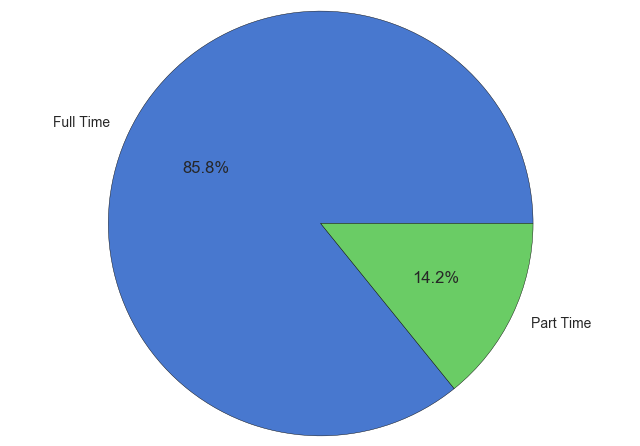

In [130]:
# Plot
plt.pie(full_time_freq[:2], labels=['Full Time', 'Part Time'], colors=sns.color_palette("muted", n_colors=2), autopct='%1.1f%%')
plt.axis('equal')
plt.figure(figsize=(2,2))
plt.show()

** 6. Prevailing Wage **

In [131]:
data['PREVAILING_WAGE'].describe()

count    2.877765e+06
mean     1.451666e+05
std      5.307856e+06
min      0.000000e+00
25%      5.460000e+04
50%      6.512500e+04
75%      8.151500e+04
max      6.997607e+09
Name: PREVAILING_WAGE, dtype: float64

** 7. Year **

In [132]:
data1 = data.YEAR.astype(int)

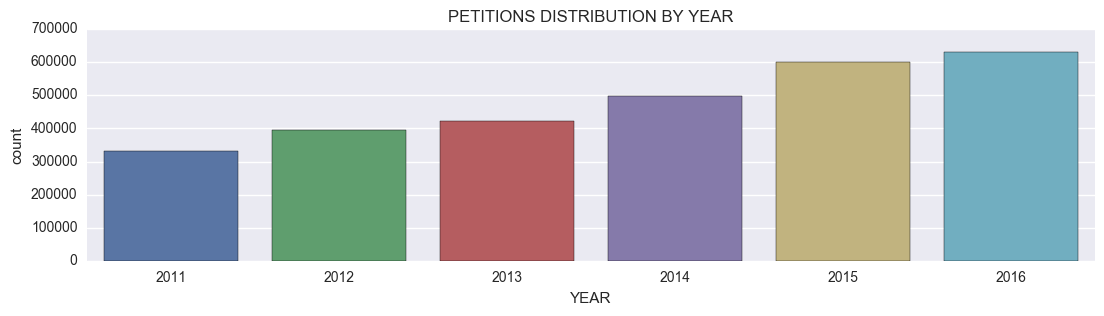

In [133]:
sns.set_context("notebook",font_scale=1.0)
plt.figure(figsize=(13,3))
plt.title('PETITIONS DISTRIBUTION BY YEAR')
sns.countplot(data1)

** 8. Worksite **

In [117]:
us_state_abbrev = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'DISTRICT OF COLUMBIA': 'DC',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'NA': 'NA',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virginia': 'VA',
    'Washington': 'WA',
    'Washington, DC': 'DC',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY',
}

def capitalize_keys(d):
    result = {}
    for key, value in d.items():
        upper_key = key.upper()
        result[upper_key] = value
    return result

abbr_states = capitalize_keys(us_state_abbrev)


def extract_state(x):
    state_name = x.split(',')[1].strip()
    if state_name in abbr_states:
        return abbr_states[state_name]
    else:
        return state_name

data['STATE'] = data['WORKSITE'].apply(extract_state)

In [121]:
graph_data = data['STATE'].value_counts()

scl = [[0.0, 'rgb(242,240,247)'],[0.2, 'rgb(218,218,235)'],[0.4, 'rgb(188,189,220)'],\
            [0.6, 'rgb(158,154,200)'],[0.8, 'rgb(117,107,177)'],[1.0, 'rgb(84,39,143)']]

input_data = [ dict(
        type='choropleth',
        colorscale = scl,
        autocolorscale = False,
        locations = graph_data.index,
        z = graph_data.astype(float),
        locationmode = 'USA-states',
        #text = df['text'],
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            ) ),
        colorbar = dict(
            title = "Millions USD")
        ) ]

layout = dict(
        title = 'Number of H1B petitions filed by each state in USA',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)'),
             )
    
fig = dict( data=input_data, layout=layout )
py.iplot( fig, filename='d3-cloropleth-map' )

High five! You successfuly sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~eyesball/0 or inside your plot.ly account where it is named 'd3-cloropleth-map'
